In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import pandas as pd
from scipy.integrate import trapz

# Opening all files

In [2]:
background_file= pd.read_csv('TPA for sample 3 and 4/background 2024 May 22 13_22_47 45.csv')
background_intensity= background_file.iloc[:,5].values
background_wavelength= background_file.iloc[:,2].values

reference_sample= pd.read_csv('TPA for sample 3 and 4/ref0522_800nm.csv')
reference_intensity= reference_sample.iloc[:, 7:12].values
reference_wavelength= reference_sample.iloc[:, 0].values

big_particles= pd.read_csv('TPA for sample 3 and 4/big particles_800nm.csv')
big_particles_intensity= big_particles.iloc[:, 4:9].values
big_particles_wavelength= big_particles.iloc[:,0].values

small_particles= pd.read_csv('TPA for sample 3 and 4/small particles_800nm .csv')
small_particles_intensity= small_particles.iloc[:, 7:12].values
small_particles_wavelength= small_particles.iloc[:,0].values


# finding areas

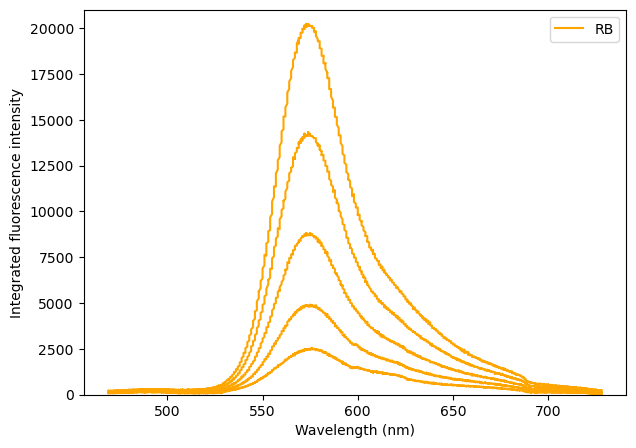

In [3]:
areas_reference = []
plt.figure(figsize=(7,5))
for i in range(reference_intensity.shape[1]):
    adjusted_intensity = reference_intensity[:, i] - background_intensity
    plt.plot(reference_wavelength, adjusted_intensity, color='orange')
    area_reference = np.trapz(adjusted_intensity, x=reference_wavelength)
    areas_reference.append(area_reference)

reference_line, = plt.plot([], [], color='orange', label='RB')

plt.ylim(0,21000)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensity')
plt.legend(handles=[reference_line])

plt.show()


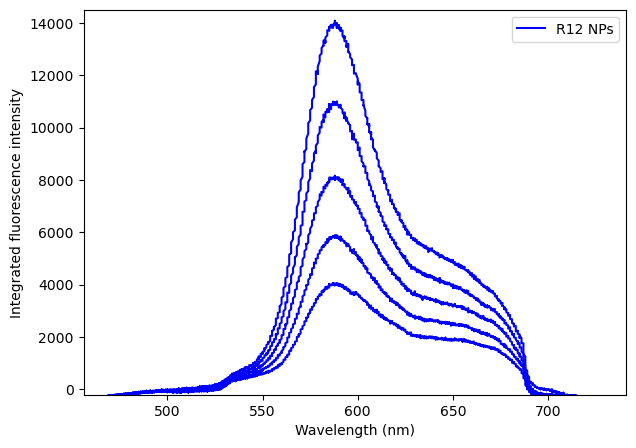

In [4]:
areas_bigparticles=[]
plt.figure(figsize=(7,5))
for i in range(big_particles_intensity.shape[1]):
    baseline_deminsion= (big_particles_wavelength >=400)& (big_particles_wavelength <=500)
    mean_baseline= np.mean(big_particles_intensity[baseline_deminsion,i])
    
    adjusted_intensity_bp = big_particles_intensity[:, i] - background_intensity - mean_baseline
    
    plt.plot(big_particles_wavelength, adjusted_intensity_bp, label=f'Intensity {i+1}', color='blue')
    areas_bp = np.trapz(adjusted_intensity_bp, x=big_particles_wavelength)
#     print(areas_bp)
    
    areas_bigparticles.append(areas_bp)

big_particles_line, = plt.plot([], [], color='blue', label='R12 NPs')

plt.ylim(-200,14500)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensity')
plt.legend(handles=[big_particles_line])


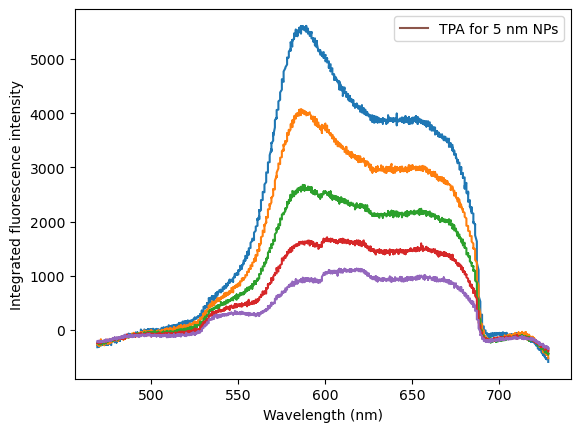

In [5]:
areas_smallparticles=[]

for i in range(small_particles_intensity.shape[1]):
    baseline_deminsion= (small_particles_wavelength >=400) & (small_particles_wavelength <=500)
    mean_baseline= np.mean(small_particles_intensity[baseline_deminsion,i])
    
    adjusted_intensity_without_baseline = small_particles_intensity[:, i] - background_intensity
    adjusted_intensity_sp= adjusted_intensity_without_baseline - mean_baseline
    
    plt.plot(small_particles_wavelength, adjusted_intensity_sp)
    areas_sp = np.trapz(adjusted_intensity_sp, x=small_particles_wavelength)
#     print(areas_sp)
    
    areas_smallparticles.append(areas_sp)
plt.plot([],[], label='TPA for 5 nm NPs')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensity')
plt.legend()

plt.show()


ref_iexc shape: (5,)
ref_F shape: (5,)


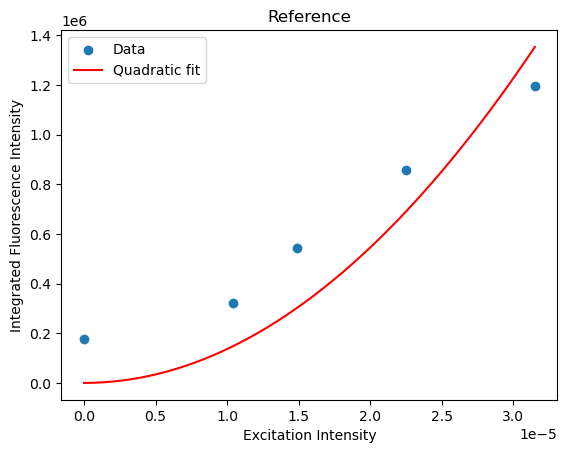

Optimized 'a': 1363445092500911.2


In [6]:
ref_iexc = np.array(reference_sample.iloc[:, 1][7:12].values)
ref_F = np.array(areas_reference)

def quadratic_fit(I_excitation, a):
    return a * I_excitation**2

print("ref_iexc shape:", ref_iexc.shape)
print("ref_F shape:", ref_F.shape)

X = ref_iexc[:, np.newaxis]**2

a_opt, _, _, _ = np.linalg.lstsq(X, ref_F, rcond=None)

ref_iexc_fit = np.linspace(min(ref_iexc), max(ref_iexc))
ref_F_fit = quadratic_fit(ref_iexc_fit, a_opt)

# Plotting
plt.scatter(ref_iexc, ref_F, label='Data')
plt.plot(ref_iexc_fit, ref_F_fit, 'r-', label='Quadratic fit')
plt.xlabel('Excitation Intensity')
plt.ylabel('Integrated Fluorescence Intensity')
plt.title('Reference')
plt.legend()
plt.show()

print("Optimized 'a':", a_opt[0])

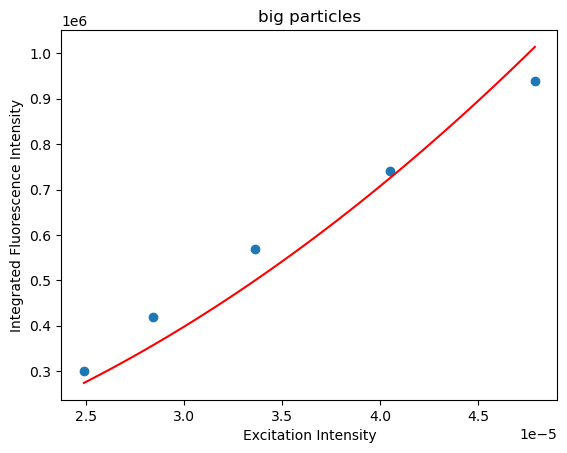

Optimized 'a': [4.41962717e+14]


In [7]:
bp_iexc = np.array(big_particles.iloc[:, 1][4:9].values)
bp_F = np.array(areas_bigparticles)

#Define the function to fit (only quadratic term)
def quadratic_fit(I_excitation, a):
    return a * I_excitation**2

# Construct the design matrix
X_bp = bp_iexc[:, np.newaxis]**2

# Solve for the coefficient 'a' using least squares
a_opt = np.linalg.lstsq(X_bp, bp_F, rcond=None)[0]

# Generate fitted curve using the obtained coefficient
bp_iexc_fit = np.linspace(min(bp_iexc), max(bp_iexc))
bp_F_fit = quadratic_fit(bp_iexc_fit, a_opt)

# Plotting
plt.scatter(bp_iexc, bp_F)
plt.plot(bp_iexc_fit,bp_F_fit, 'r-')

plt.xlabel('Excitation Intensity')
plt.ylabel('Integrated Fluorescence Intensity')
plt.title('big particles')
plt.show()

# Optimized coefficient 'a'
print("Optimized 'a':", a_opt)

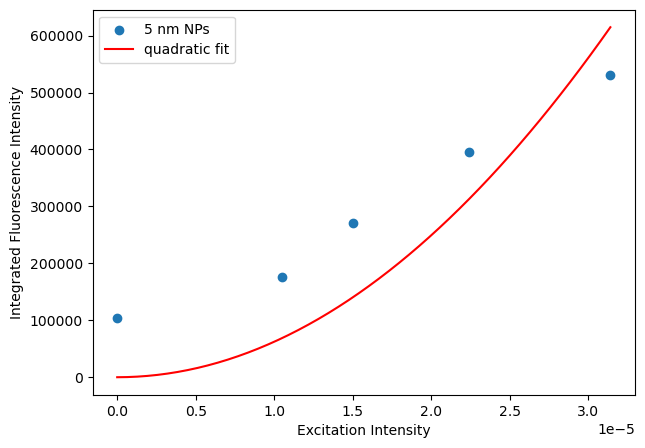

Optimized 'a': [6.23439406e+14]


In [8]:
sp_iexc= np.array(small_particles.iloc[:,1][7:12])
sp_F= np.array(areas_smallparticles)

def quadratic_fit(I_excitation, a):
    return a * I_excitation**2

plt.figure(figsize=(7,5))

X_sp = sp_iexc[:, np.newaxis]**2

a_opt = np.linalg.lstsq(X_sp, sp_F, rcond=None)[0]

sp_iexc_fit = np.linspace(min(sp_iexc), max(sp_iexc))
sp_F_fit = quadratic_fit(sp_iexc_fit, a_opt)

# Plotting
plt.scatter(sp_iexc, sp_F, label= '5 nm NPs')
plt.plot(sp_iexc_fit,sp_F_fit, 'r-', label= 'quadratic fit')

plt.xlabel('Excitation Intensity')
plt.ylabel('Integrated Fluorescence Intensity')
plt.legend()
plt.show()

# Optimized coefficient 'a'
print("Optimized 'a':", a_opt)

# absorption

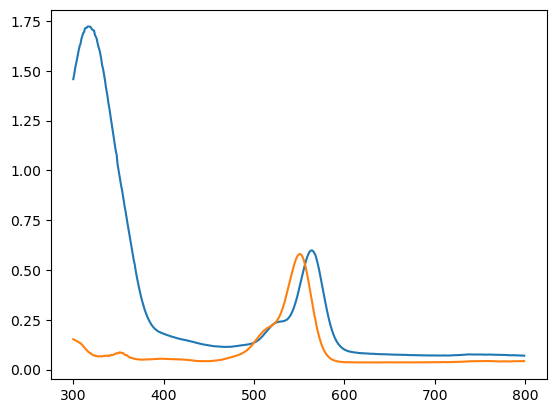

In [9]:
abs_sp= pd.read_csv('TPA for sample 3 and 4/abs for big and very small nps with reference sample.csv')
abs_bp= pd.read_csv( 'TPA for sample 3 and 4/abs for big nps smiles .csv')

plt.plot(abs_bp.iloc[:,0], abs_bp.iloc[:,1])
plt.plot(abs_sp.iloc[:,2], abs_sp.iloc[:,3])

the blue curve is the small particles

the orange one is the big particles

the green one is the reference sample

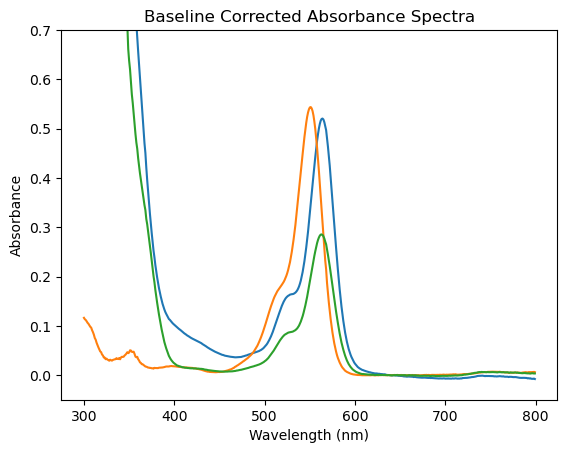

Absorbance at 560 nm for Sample 1: 0.5002951461
Absorbance at 560 nm for Sample 2: 0.2791055463793069
Absorbance at 542 nm for Reference Sample  0.4485544761707921


In [10]:
baseline_start = 600
baseline_end = 700

corrected_data = []
abs_560_values = []
abs_542_values = []

columns = [(0, 1), (2, 3), (4, 5)]


for wl_col, abs_col in columns:

    wavelengths = abs_sp.iloc[:, wl_col]
    absorbances = abs_sp.iloc[:, abs_col]


    baseline_avg = absorbances[(wavelengths >= baseline_start) & (wavelengths <= baseline_end)].mean()

 
    corrected_absorbances = absorbances - baseline_avg
    corrected_data.append((wavelengths, corrected_absorbances))

    if wl_col in [0, 4]:
        abs_560 = corrected_absorbances[wavelengths == 560].values[0]
        abs_560_values.append(abs_560)
    elif wl_col in [2]:
        abs_542 = corrected_absorbances[wavelengths == 542].values[0]
        abs_542_values.append(abs_542)

for i, (wavelengths, corrected_absorbances) in enumerate(corrected_data):
    plt.plot(wavelengths, corrected_absorbances, label=f'Sample {i+1}')

plt.ylim(-0.05, 0.7)
# plt.xlim(400, 700)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected Absorbance Spectra')
plt.show()

for i, abs_560 in enumerate(abs_560_values):
    print(f'Absorbance at 560 nm for Sample {i+1}: {abs_560}')

for i, abs_542 in enumerate(abs_542_values):
    print(f'Absorbance at 542 nm for Reference Sample  {abs_542}')


# particle size

(3.5, 6.5)

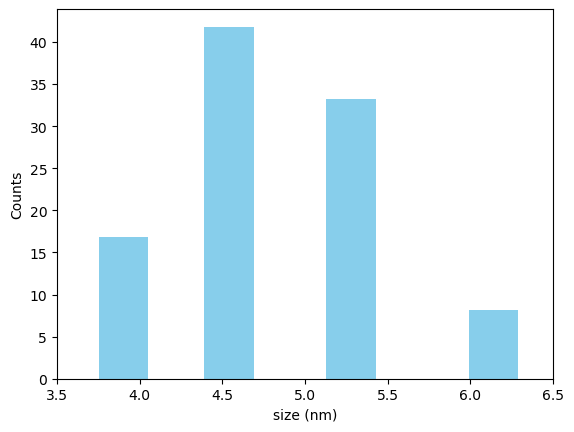

In [11]:
sp_size=np.loadtxt('TPA for sample 3 and 4/very small nps0.txt')
plt.bar(sp_size[:,0], sp_size[:,1], width= 0.3, color= 'skyblue')
#print(sp_size)
plt.xlabel('size (nm)')
plt.ylabel('Counts')
plt.xlim(3.5,6.5)

Text(0, 0.5, 'Counts')

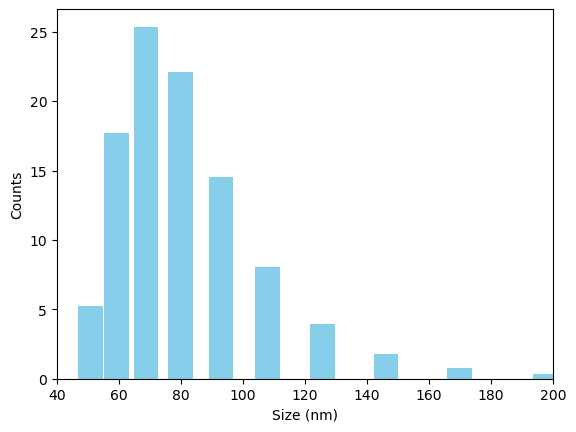

In [12]:
bp_size= np.loadtxt('TPA for sample 3 and 4/huge nps.txt')
plt.bar(bp_size[:,2], bp_size[:,3], width= 8, color='skyblue')
plt.xlim(40,200)
plt.xlabel('Size (nm)')
plt.ylabel('Counts')

# figures for the project

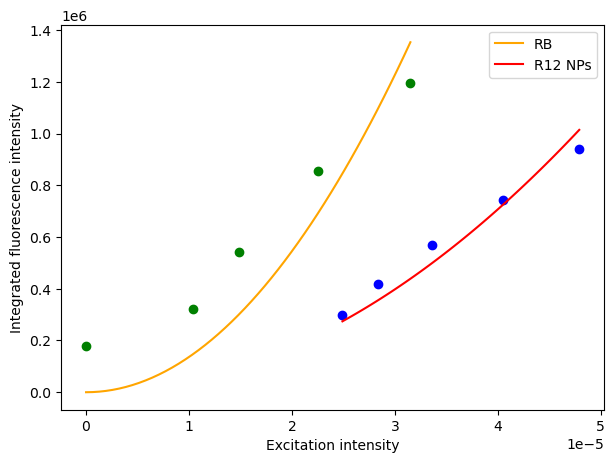

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(ref_iexc, ref_F, color='green')
plt.plot(ref_iexc_fit, ref_F_fit, color='orange', label= 'RB')

plt.scatter(bp_iexc, bp_F, color='blue')
plt.plot(bp_iexc_fit,bp_F_fit, 'r-', label='R12 NPs')

#plt.title('Integrated fluorescence intensity and excitation intensity')

plt.xlabel('Excitation intensity')
plt.ylabel('Integrated fluorescence intensity')
plt.legend()